# Titanic Survival Prediction :

## Importing required libraries -

Pandas - This library is used to perform functions on dataframe's read from a CSV File.  
Numpy - An optimised library for application on arrays.  
MatPlotLib - A library that we use to visualise the data.  
SkLearn - A library to perform ML operations.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error,f1_score
from sklearn.linear_model import LogisticRegression

## Read The CSV File

In [3]:
raw_dataframe = pd.read_csv("train.csv")

## Analyse the first 5 columns of the Data

In [4]:
raw_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Study column wise data

In [5]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Calculate Column wise error data:

In [6]:
print("Count of NaN data in every column:")
raw_dataframe.isna().sum()

Count of NaN data in every column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Functions for different features :

In [7]:
def initSex(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 2}).astype(int)
    return df

def initEmbarked(df):
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'C': 1, 'S': 2,'Q': 3})
    return df

def initAge(df):
    meanAge = df['Age'].mean()
    standardAge = df['Age'].std()
    nanAgeCount = df['Age'].isna().sum()
    upperLimit = meanAge+standardAge
    lowerLimit = meanAge-standardAge
    randomiserList = np.random.randint(lowerLimit,upperLimit,nanAgeCount)
    df.loc[df['Age'].isnull(), 'Age'] = randomiserList
    return df

def initCabin(df):
    df['CabinFlag'] = df['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
    return df

def initFeatures(df):
    df['AgeClass'] = df.loc[:,'Age']*df.loc[:,'Pclass']
    df['SexAge'] = df.loc[:,'Sex']*df.loc[:,'Age']
    return df

def initFamily(df):
    df["FamilySize"] = df["SibSp"]+df["Parch"]+1
    return df

def initDeck(df):
    Deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8 }
    df['Deck'] = df["Cabin"].astype(str).str[0]
    df['Deck'] = df['Deck'].map(Deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)
    return df

def initTitle(df):
    #title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev','Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess','Don', 'Jonkheer']
    titles = {"Mr": 1, "Mlle":2, "Miss": 2, "Ms":2, "Mme":3 ,"Mrs": 3, "Master": 4, "Rare": 5}
    rare = ['Major', 'Rev','Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess','Don', 'Jonkheer','Sir','Dona','Lady']    
    
    df['Title'] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(rare,'Rare')
    df['Title'] = df['Title'].map(titles)
    return df

def dropCols(df):
    df = df.drop("Name",axis=1)
    df = df.drop("Ticket",axis=1)
    df = df.drop("Cabin",axis=1)
    df = df.drop("SibSp",axis=1)
    return df    
    
def edit_dataframe(df):
    df = initSex(df)
    df = initEmbarked(df)
    df = initAge(df)
    df = initCabin(df)
    df = initFeatures(df)
    df = initFamily(df)
    df = initTitle(df)
    df = initDeck(df)
    df = dropCols(df)
    return df

## Creating a new dataframe after making the changes in the features :

In [8]:
new_dataframe = edit_dataframe(raw_dataframe)

## Analyse the new data set :

In [9]:
new_dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,CabinFlag,AgeClass,SexAge,FamilySize,Title,Deck
0,1,0,3,2,22.0,0,7.2500,2,0,66.0,44.0,2,1,0
1,2,1,1,1,38.0,0,71.2833,1,1,38.0,38.0,2,3,3
2,3,1,3,1,26.0,0,7.9250,2,0,78.0,26.0,1,2,0
3,4,1,1,1,35.0,0,53.1000,2,1,35.0,35.0,2,3,3
4,5,0,3,2,35.0,0,8.0500,2,0,105.0,70.0,1,1,0


## Check the new dataset for any corrupted data :

In [10]:
print("Count of NaN data in every column:")
new_dataframe.isna().sum()

Count of NaN data in every column:


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
CabinFlag      0
AgeClass       0
SexAge         0
FamilySize     0
Title          0
Deck           0
dtype: int64

## Visualising function for a dataframe

In [11]:
def showData(df):
    for i in range(2,len(df.columns)):
        Parameters = df.columns[i]
        plt.hist(x = [df[df['Survived']==1][Parameters], df[df['Survived']==0][Parameters]], label = ['Survived','Dead'])
        plt.title('Survival')
        plt.xlabel(Parameters)
        plt.ylabel('Number of Passengers')
        plt.legend()
        plt.show()

## Visualising the new dataframe :

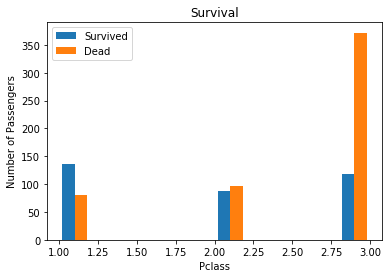

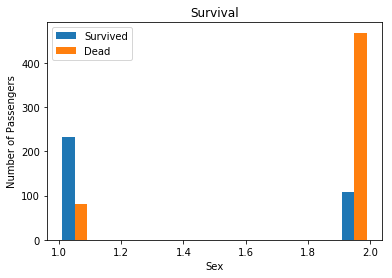

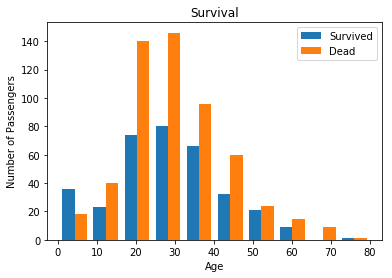

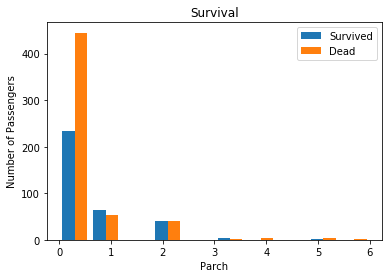

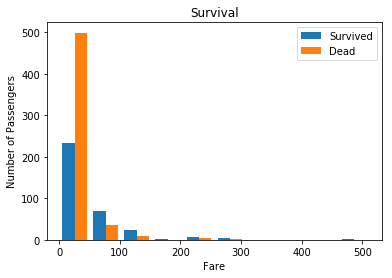

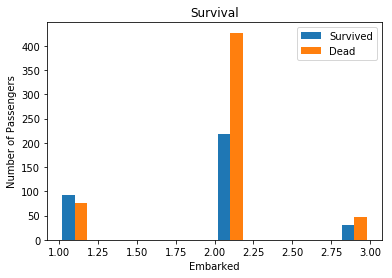

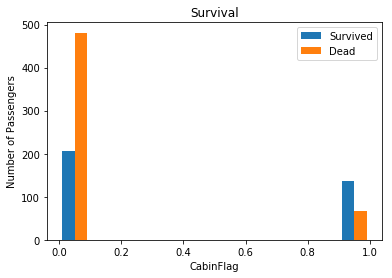

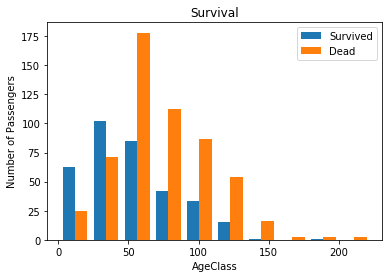

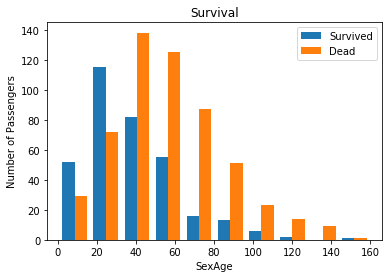

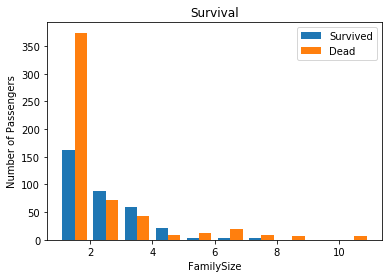

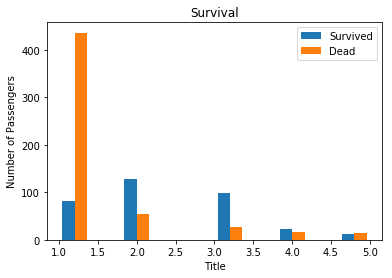

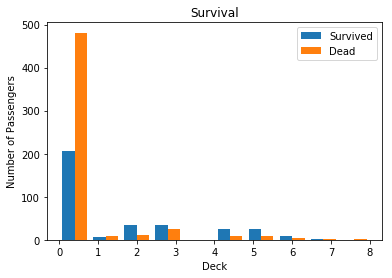

In [12]:
showData(new_dataframe)

## Making a train-test-split of the data :

In [13]:
train_x, test_x, train_y, test_y = train_test_split(
    new_dataframe.loc[:, ('PassengerId','Pclass','Sex','Age','Parch','Embarked','CabinFlag','AgeClass','SexAge','FamilySize','Title')], new_dataframe.loc[:, ('Survived')], test_size=0.2, random_state=6)

In [14]:
print("Size:\nX Train = ",train_x.shape,"\nY Train = ",train_y.shape,"\nX Test = ",test_x.shape,"\nY Test = ",test_y.shape)

Size:
X Train =  (712, 11) 
Y Train =  (712,) 
X Test =  (179, 11) 
Y Test =  (179,)


## Fiting the Logistic Regression Model :

In [15]:
logisticRegression = LogisticRegression()
logisticRegression.fit(train_x, train_y)
predictions = logisticRegression.predict(test_x)
accuracyLogistic = accuracy_score(test_y, predictions)
mseLR = mean_squared_error(test_y,predictions)
maeLR = mean_absolute_error (test_y,predictions)
F1LR = f1_score(test_y,predictions,average='weighted')

print('Test Accuracy for Logistic Regression: ', accuracyLogistic)
print('Test Accuracy for Logistic Regression(RMS): ', mseLR)
print("Test Accuracy for Logistic Regression(MAE): ", maeLR)
print("F1 - Score : ", F1LR )

Test Accuracy for Logistic Regression:  0.8715083798882681
Test Accuracy for Logistic Regression(RMS):  0.12849162011173185
Test Accuracy for Logistic Regression(MAE):  0.12849162011173185
F1 - Score :  0.8692679447892778


# Training on different Classifiers:
### Importing the classifiers from sklearn -

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Linear Regression
from sklearn.linear_model import LinearRegression
# Support Vector Machines
from sklearn import svm

## Linear Regression Classifier: 

In [17]:
LRegression = LinearRegression()
#Training the model
LRegression.fit(train_x,train_y)
#Predicting using the learnt classifier
LRPredictions = LRegression.predict(test_x)
#Accuracy Scores : 
LINmae = mean_absolute_error (test_y,LRPredictions)
LINmse = mean_squared_error(test_y,LRPredictions)
print("Mean Absolute Error : ", LINmae)
print("Mean Squared Error :", LINmse )

Mean Absolute Error :  0.2674518616916762
Mean Squared Error : 0.12740194331177124


## K-NN Classifier: 

In [18]:
score=[]
# Calculating the best accuracy score for each N-neighbors
for k in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=k, weights='distance') 
    #training the model
    KNN.fit(train_x, train_y)
    #predict using the learnt classifier
    Kprediction = KNN.predict(test_x) 
    #Accuracy Score :
    accuracyKNN = accuracy_score(test_y, Kprediction)
    score.append(accuracyKNN)

# Selecting the k with best accuracy score
k = (score.index(max(score)))+1
print("K = ",k)
# Training the model on this k
KNN = KNeighborsClassifier(n_neighbors=k, weights='distance') 
#training the model
KNN.fit(train_x, train_y)
#predict using the learnt classifier
Kprediction = KNN.predict(test_x) 
#Accuracy Scores :
F1KNN = f1_score(test_y,Kprediction,average='weighted')
accuracyKNN = accuracy_score(test_y, Kprediction)
mseKNN = mean_squared_error(test_y,Kprediction)
maeKNN = mean_absolute_error (test_y,Kprediction)
print('Test Accuracy for KNN classifier: ', accuracyKNN)
print('Test Accuracy for KNN (RMS): ', mseKNN)
print("Test Accuracy for KNN (MAE): ", maeKNN)
print("F1 - Score : ", F1KNN )

K =  3
Test Accuracy for KNN classifier:  0.7653631284916201
Test Accuracy for KNN (RMS):  0.2346368715083799
Test Accuracy for KNN (MAE):  0.2346368715083799
F1 - Score :  0.7607179834249426


## Support Vector Machine :

In [19]:
# Selecting linear kernal type 
ktype="linear"
SVM_cls = svm.SVC(kernel = ktype)
# Train the Clssifier on the training set
SVM_cls.fit(train_x, train_y)
# Predicting using the learnt classifier
svmPrediction = SVM_cls.predict(test_x)
# Accuracy scores claculations :
accuracysvm = accuracy_score(test_y, svmPrediction)
mseSVM = mean_squared_error(test_y,svmPrediction)
maeSVM = mean_absolute_error (test_y,svmPrediction)
F1SVM =  f1_score(test_y,svmPrediction,average='binary')

print('Test Accuracy for SVM [kernal :"',ktype,'"] classifier: ',accuracysvm )
print('Test Accuracy for SVM(RMS): ', mseSVM )
print('Test Accuracy for SVM (MAE): ', maeSVM )    
print("F1 - Score : ", F1SVM)

Test Accuracy for SVM [kernal :" linear "] classifier:  0.8491620111731844
Test Accuracy for SVM(RMS):  0.15083798882681565
Test Accuracy for SVM (MAE):  0.15083798882681565
F1 - Score :  0.784


## Decision Tree Classifier :

In [20]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth =6)
# Train the Clssifier on the training set
DTree.fit(train_x,train_y)
# Predicting using the learnt classifier
DTreePredictions = DTree.predict(test_x)
# Accuracy scores claculations :
accuracyDT = accuracy_score(test_y, DTreePredictions)
DTmse = mean_squared_error(test_y,DTreePredictions)
DTmae = mean_absolute_error (test_y,DTreePredictions)
F1DT =  f1_score(test_y,DTreePredictions,average='weighted')

print("Test Accuracy for Decision Tree classifier: ", accuracyDT)
print("Test Accuracy for Decision Tree (RMS): ",DTmse )
print("Test Accuracy for Decision Tree (MAE): ", DTmae)
print("F1 - Score : ", F1DT)

Test Accuracy for Decision Tree classifier:  0.8435754189944135
Test Accuracy for Decision Tree (RMS):  0.1564245810055866
Test Accuracy for Decision Tree (MAE):  0.1564245810055866
F1 - Score :  0.8388583783101347


# REPORT :

In [21]:
data_report = np.array([['Algorithm','Accuracy Score','F1-Score','Mean Square Error','Mean Absolute Error'],['Logistic Regression',F1LR,accuracyLogistic,mseLR,maeLR],['Linear Regression','N/A','N/A',LINmse,LINmae ],['KNN',accuracyKNN ,F1KNN,mseKNN,maeKNN],['SVM',accuracysvm ,F1SVM,mseSVM,maeSVM],['Decision Tree',accuracyDT ,F1DT,DTmse,DTmae]])

df_report = pd.DataFrame(data = data_report[1:,1:], index = data_report[1:,0],columns = data_report[0,1:])
df_report

,Accuracy Score,F1-Score,Mean Square Error,Mean Absolute Error
Logistic Regression,0.8692679447892778,0.8715083798882681,0.12849162011173185,0.12849162011173185
Linear Regression,N/A,N/A,0.12740194331177124,0.2674518616916762
KNN,0.7653631284916201,0.7607179834249426,0.2346368715083799,0.2346368715083799
SVM,0.8491620111731844,0.784,0.15083798882681565,0.15083798882681565
Decision Tree,0.8435754189944135,0.8388583783101347,0.1564245810055866,0.1564245810055866


###### Thank you!